In [1]:
!pip install geopandas
!apt-get install libproj-dev proj-data proj-bin  
!apt-get install libgeos-dev  
!pip install cython  
!pip install cartopy
!pip install geoplot  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 2.1 MB/s 
     |████████████████████████████████| 6.3 MB 52.0 MB/s 
     |████████████████████████████████| 16.7 MB 52.4 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]


In [2]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot as gplt

In [3]:
r = requests.get('https://api.data.gov.sg/v1/transport/traffic-images?date_time=2019-01-01T00%3A00%3A00', auth=('user', 'pass'))
r.status_code

200

In [4]:
df = pd.json_normalize(r.json()['items'][0]['cameras'])
df

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5
0,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1501,1.274144,103.851317,240,320,95feb086c24db3ac1be9b1e6dc194194
1,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1502,1.271351,103.861828,240,320,d2dbeaed33ac9a523eb8f9a4138657d0
2,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1503,1.270664,103.856978,240,320,fdd3313e5a4a2b786444a7371db349c9
3,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1504,1.294099,103.876056,240,320,b8f1220bff0f26bc0ec11521e2b16fc1
4,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1505,1.275298,103.866390,240,320,ba53008cf3198ed272e8d35e52db1354
...,...,...,...,...,...,...,...,...
82,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1001,1.295313,103.871146,240,320,39bf0b228e857fdd02e6eea7e8796604
83,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1703,1.328147,103.862203,480,640,db2e6d73cceb5833dbd193fbabb449eb
84,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,2705,1.367286,103.779470,480,640,4cdb7e6b802a5757fbfc77951fbbdfb4
85,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,3702,1.338310,103.980320,480,640,a4b73caa57b8cc0d35dd7c12e9e7ce82


In [5]:
map_df = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Project Traffic/master-plan-2014-planning-area-boundary-no-sea-shp/MP14_PLNG_AREA_NO_SEA_PL.shp')
map_df

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,ANG MO KIO,AM,N,NORTH-EAST REGION,NER,E5CBDDE0C2113055,2016-05-11,28976.8763,40229.1238,17494.240190,1.394138e+07,"POLYGON ((30658.500 42047.527, 30679.195 42020..."
1,2,BEDOK,BD,N,EAST REGION,ER,1719251260799DF6,2016-05-11,38582.6650,34032.0961,21872.798962,2.173319e+07,"POLYGON ((38974.269 36138.243, 39371.471 35747..."
2,3,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2016-05-11,28789.7630,37450.8865,13517.121556,7.618921e+06,"POLYGON ((29772.191 38311.805, 29784.826 38304..."
3,4,BOON LAY,BL,N,WEST REGION,WR,A3DC87118B43CDED,2016-05-11,13410.3824,33008.9884,18528.467448,8.279408e+06,"POLYGON ((12861.383 32207.492, 12860.555 32208..."
4,5,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2016-05-11,19255.4150,37527.6527,15234.223423,1.113326e+07,"POLYGON ((20294.455 39114.528, 20334.318 39054..."
5,6,BUKIT MERAH,BM,N,CENTRAL REGION,CR,738B479882E4EE28,2016-05-11,26865.7838,28662.8732,29156.293788,1.446247e+07,"POLYGON ((26228.631 30746.197, 26231.960 30743..."
6,7,BUKIT PANJANG,BP,N,WEST REGION,WR,4A9C6E6BAF7BE998,2016-05-11,21287.0436,38761.8448,15891.853279,9.019940e+06,"POLYGON ((21448.724 41356.741, 21508.535 40890..."
7,8,BUKIT TIMAH,BT,N,CENTRAL REGION,CR,C893AEAD20F42559,2016-05-11,23256.7643,34689.0037,22492.840844,1.752665e+07,"POLYGON ((24031.387 36694.742, 24076.658 36657..."
8,9,GEYLANG,GL,N,CENTRAL REGION,CR,957AC76DACFDE12E,2016-05-11,34255.0407,33683.8190,12959.116844,9.643156e+06,"POLYGON ((35619.754 32450.586, 35588.223 32427..."
9,10,KALLANG,KL,N,CENTRAL REGION,CR,229F1481FF686959,2016-05-11,31685.3730,32515.7735,15584.137724,9.169902e+06,"POLYGON ((31277.373 34723.293, 31305.947 34712..."


In [6]:
map_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    55 non-null     int64   
 1   PLN_AREA_N  55 non-null     object  
 2   PLN_AREA_C  55 non-null     object  
 3   CA_IND      55 non-null     object  
 4   REGION_N    55 non-null     object  
 5   REGION_C    55 non-null     object  
 6   INC_CRC     55 non-null     object  
 7   FMEL_UPD_D  55 non-null     object  
 8   X_ADDR      55 non-null     float64 
 9   Y_ADDR      55 non-null     float64 
 10  SHAPE_Leng  55 non-null     float64 
 11  SHAPE_Area  55 non-null     float64 
 12  geometry    55 non-null     geometry
dtypes: float64(4), geometry(1), int64(1), object(7)
memory usage: 5.7+ KB


In [7]:
map_df['geometry'] = map_df['geometry'].to_crs('EPSG:4326') 
map_df

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,ANG MO KIO,AM,N,NORTH-EAST REGION,NER,E5CBDDE0C2113055,2016-05-11,28976.8763,40229.1238,17494.240190,1.394138e+07,"POLYGON ((103.85721 1.39654, 103.85739 1.39630..."
1,2,BEDOK,BD,N,EAST REGION,ER,1719251260799DF6,2016-05-11,38582.6650,34032.0961,21872.798962,2.173319e+07,"POLYGON ((103.93193 1.34309, 103.93550 1.33956..."
2,3,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2016-05-11,28789.7630,37450.8865,13517.121556,7.618921e+06,"POLYGON ((103.84924 1.36275, 103.84936 1.36268..."
3,4,BOON LAY,BL,N,WEST REGION,WR,A3DC87118B43CDED,2016-05-11,13410.3824,33008.9884,18528.467448,8.279408e+06,"POLYGON ((103.69729 1.30754, 103.69728 1.30755..."
4,5,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2016-05-11,19255.4150,37527.6527,15234.223423,1.113326e+07,"POLYGON ((103.76408 1.37001, 103.76444 1.36947..."
5,6,BUKIT MERAH,BM,N,CENTRAL REGION,CR,738B479882E4EE28,2016-05-11,26865.7838,28662.8732,29156.293788,1.446247e+07,"POLYGON ((103.81740 1.29433, 103.81743 1.29431..."
6,7,BUKIT PANJANG,BP,N,WEST REGION,WR,4A9C6E6BAF7BE998,2016-05-11,21287.0436,38761.8448,15891.853279,9.019940e+06,"POLYGON ((103.77445 1.39029, 103.77499 1.38607..."
7,8,BUKIT TIMAH,BT,N,CENTRAL REGION,CR,C893AEAD20F42559,2016-05-11,23256.7643,34689.0037,22492.840844,1.752665e+07,"POLYGON ((103.79766 1.34813, 103.79806 1.34779..."
8,9,GEYLANG,GL,N,CENTRAL REGION,CR,957AC76DACFDE12E,2016-05-11,34255.0407,33683.8190,12959.116844,9.643156e+06,"POLYGON ((103.90179 1.30975, 103.90150 1.30954..."
9,10,KALLANG,KL,N,CENTRAL REGION,CR,229F1481FF686959,2016-05-11,31685.3730,32515.7735,15584.137724,9.169902e+06,"POLYGON ((103.86277 1.33030, 103.86302 1.33020..."


In [8]:
camera_df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['location.longitude'], df['location.latitude']))
camera_df

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,geometry
0,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1501,1.274144,103.851317,240,320,95feb086c24db3ac1be9b1e6dc194194,POINT (103.85132 1.27414)
1,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1502,1.271351,103.861828,240,320,d2dbeaed33ac9a523eb8f9a4138657d0,POINT (103.86183 1.27135)
2,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1503,1.270664,103.856978,240,320,fdd3313e5a4a2b786444a7371db349c9,POINT (103.85698 1.27066)
3,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1504,1.294099,103.876056,240,320,b8f1220bff0f26bc0ec11521e2b16fc1,POINT (103.87606 1.29410)
4,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1505,1.275298,103.866390,240,320,ba53008cf3198ed272e8d35e52db1354,POINT (103.86639 1.27530)
...,...,...,...,...,...,...,...,...,...
82,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1001,1.295313,103.871146,240,320,39bf0b228e857fdd02e6eea7e8796604,POINT (103.87115 1.29531)
83,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1703,1.328147,103.862203,480,640,db2e6d73cceb5833dbd193fbabb449eb,POINT (103.86220 1.32815)
84,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,2705,1.367286,103.779470,480,640,4cdb7e6b802a5757fbfc77951fbbdfb4,POINT (103.77947 1.36729)
85,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,3702,1.338310,103.980320,480,640,a4b73caa57b8cc0d35dd7c12e9e7ce82,POINT (103.98032 1.33831)


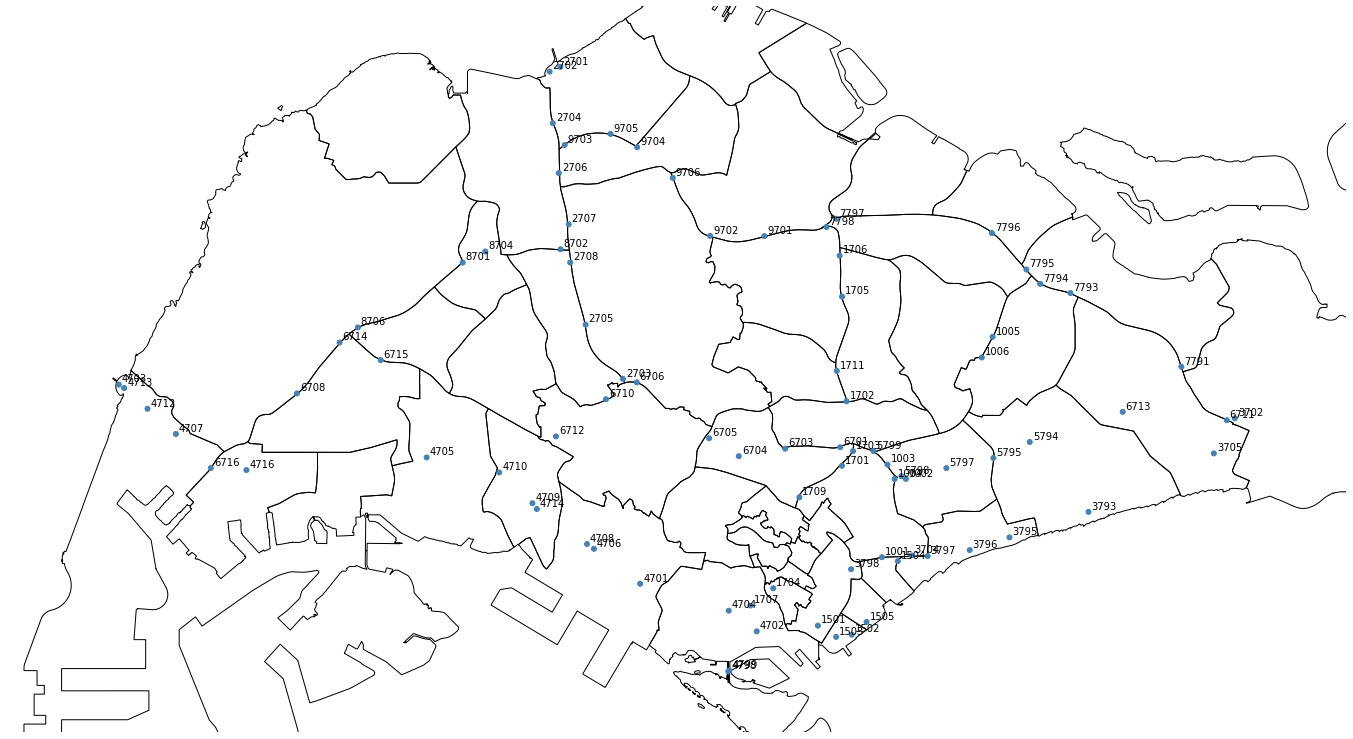

In [15]:
ax = gplt.polyplot(map_df, figsize=(24, 18))
gplt.pointplot(camera_df, ax=ax)
for x, y, label in zip(camera_df['geometry'].x, camera_df['geometry'].y, camera_df['camera_id']):
  ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points')